<a href="https://colab.research.google.com/github/Nagasaiprasad8019/index.html/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving India Agriculture Crop Production.csv to India Agriculture Crop Production.csv


In [2]:
#2 Load dataset
import pandas as pd
df = pd.read_csv("India Agriculture Crop Production.csv")
print(df.shape)
df.head()

(345407, 10)


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
# 3.Basic cleanup
df = df.dropna(subset=['Crop', 'Season', 'Area', 'Production', 'Yield'])
df = df[(df['Area'] > 0) & (df['Yield'] > 0)]

In [4]:
# 4. Encode categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns


In [5]:
# 5️. Prepare features and target
X = df.drop(columns=['Yield'])
y = df['Yield']

In [6]:
# 6️. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
label = LabelEncoder()

# Automatically encode all object (text) columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label.fit_transform(X_train[col].astype(str))
        X_test[col] = label.transform(X_test[col].astype(str))


In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
# 8️⃣ Evaluate model
y_pred = model.predict(X_test)
print("✅ Model Trained Successfully!")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


✅ Model Trained Successfully!
R² Score: 0.9840401218682571
RMSE: 116.36565338558762


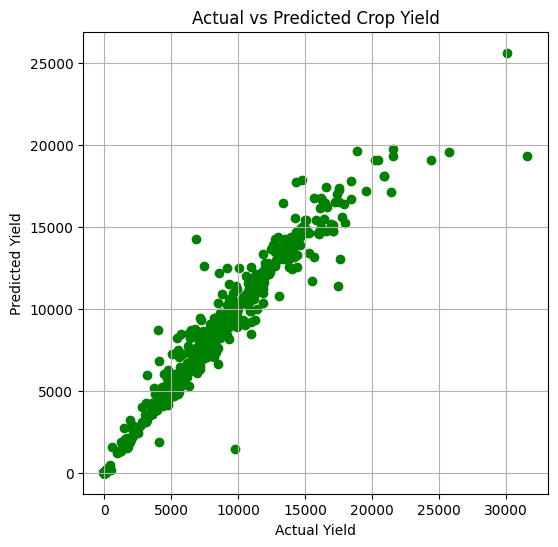

In [12]:
# 9️⃣ Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()

In [13]:
import joblib
joblib.dump(model, "crop_yield_model.pkl")


['crop_yield_model.pkl']

In [14]:
loaded_model = joblib.load("crop_yield_model.pkl")


In [15]:
sample = X_test.iloc[0:1].copy()
predicted_yield = model.predict(sample)
print("Predicted Yield for Sample:", predicted_yield[0])


Predicted Yield for Sample: 0.13709046387138435


In [16]:
import numpy as np

# Example inputs (use encoded values)
new_data = np.array([[12, 45, 6, 8, 2, 1500, 2000, 1, 1]])  # adjust columns accordingly
pred = model.predict(new_data)
print("Predicted Yield:", pred[0])


Predicted Yield: 705.4878100740019


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


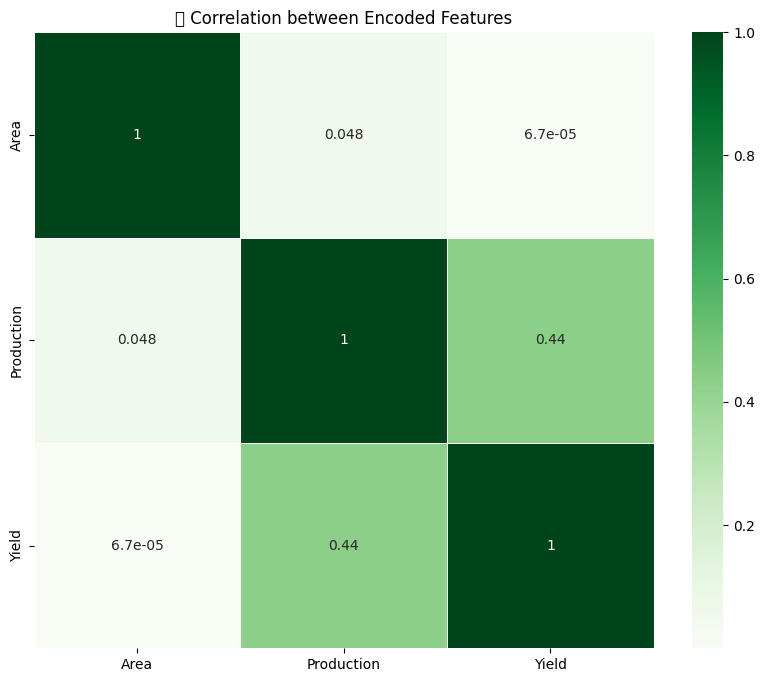

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens', linewidths=0.5)
plt.title("🌾 Correlation between Encoded Features")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


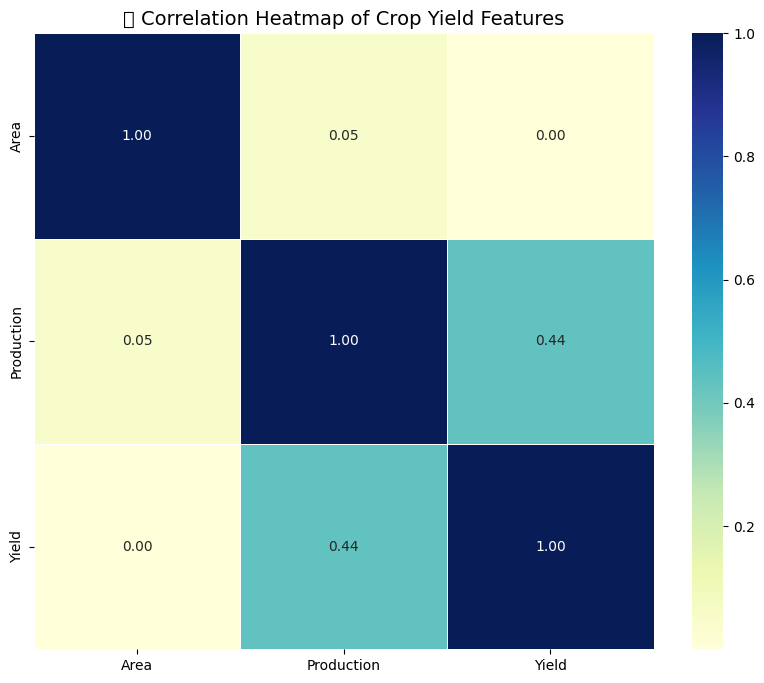

In [23]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("🌾 Correlation Heatmap of Crop Yield Features", fontsize=14)
plt.show()
